In [71]:
import json
import time
from datetime import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Part 1
#Problem 1.1

path = "tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", 
        "tweets_#nfl.txt", "tweets_#patriots.txt", 
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]

for index, name in enumerate(files):
    print "files[" + str(index) + "] => " + name

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [19]:
def load_file(files):
    file_info = []
    for line in open(path + files, 'r') :
        curr_tw = json.loads(line)
        #time current tweet is posted
        date = curr_tw['citation_date']
        #name of author
        author = curr_tw['author']['name']
        #follower of this user
        foll = curr_tw['author']['followers']
        #number of retweets
        re_tw = curr_tw['metrics']['citations']['total']
        file_info.append({'citation_date': date,'author':author, 'followers': foll, 'retweet_count': re_tw})
    return file_info


In [20]:
def get_avg_info(files):
    #load data
    file_info = load_file(files)

    #construct time list 
    time_list = []
    
    for i in range(0,len(file_info)):
        time_list.append(file_info[i]['citation_date'])
        
    time_start = min(time_list)
    time_end = max(time_list)
    time_delta = float(time_end-time_start)/3600
    
    #construct follower dict
    follower_dict = dict()

    for i in range(0,len(file_info)):
        key=file_info[i]['author']
    
        if key not in follower_dict:
            follower_dict[key] = file_info[i]['followers']
    
    #construct retweets list
    
    re_tw_list = []
    for i in range(0,len(file_info)):
        re_tw_list.append(file_info[i]['retweet_count'])
    
    #total number of tweets
    tweet_tot = len(time_list)
    
    #total number of follwers
    follwer_tot = sum(follower_dict.itervalues())
    
    #avg info
    print(files + " avg data:")
    print ("Average number of tweets per hour: " + str(tweet_tot/time_delta))
    print ("Average number of followers: "+ str(float(follwer_tot)/len(follower_dict)))
    print ("Average number of retweets: "+ str(float(sum(re_tw_list))/len(re_tw_list)))
    print ("")

In [210]:
for i in range(0,6):
    get_avg_info(files[i])

tweets_#gohawks.txt avg data:
Average number of tweets per hour: 325.371591304
Average number of followers: 1657.4274086
Average number of retweets: 0.20916252073

tweets_#gopatriots.txt avg data:
Average number of tweets per hour: 45.6945105736
Average number of followers: 1325.25823646
Average number of retweets: 0.0268374504422

tweets_#nfl.txt avg data:
Average number of tweets per hour: 441.323431137
Average number of followers: 4126.75479096
Average number of retweets: 0.0509373648774

tweets_#patriots.txt avg data:
Average number of tweets per hour: 834.555509164
Average number of followers: 1820.00749046
Average number of retweets: 0.0914617337093

tweets_#sb49.txt avg data:
Average number of tweets per hour: 1419.88790749
Average number of followers: 2459.03259365
Average number of retweets: 0.178012965702

tweets_#superbowl.txt avg data:
Average number of tweets per hour: 2302.50040188
Average number of followers: 3956.44738677
Average number of retweets: 0.136685580237



In [211]:
#plot histogram
def plot_histogram (files):
    file_info = load_file(files)
    time_list = []
    for i in range(0,len(file_info)):
        time_list.append(file_info[i]['citation_date'])
        
    hourly_tweet_count = [0] *  int((max(time_list)-min(time_list))/3600+1)
    start_time = min(time_list)
    for time in time_list:
        hourly_tweet_count[int((time - start_time)/3600)] += 1
        
    plt.bar([i for i in range(0,len(hourly_tweet_count))], hourly_tweet_count, 10, align='edge', color = 'k')
    hours_range = float(max(time_list)-min(time_list))/3600.0
    plt.axis([0,hours_range+1,0,int(max(hourly_tweet_count)*1.03)])
    plt.xlabel('Hours after first Tweet')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets over Time (' + files + ')')
    plt.show()

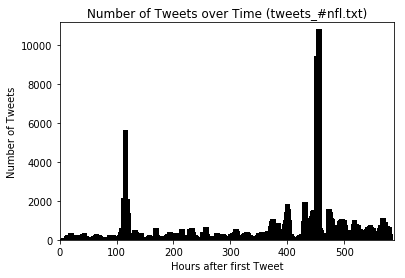

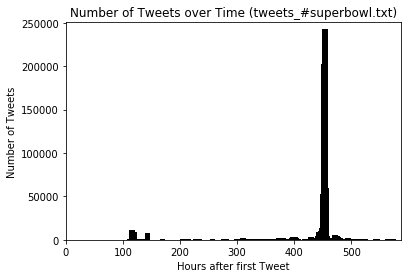

In [212]:
plot_histogram(files[2])
plot_histogram(files[5])

In [21]:
#Problem 1.2

path = "tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", 
        "tweets_#nfl.txt", "tweets_#patriots.txt", 
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]

for index, name in enumerate(files):
    print "files[" + str(index) + "] => " + name

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [72]:
def load_file(files):
    #info of total tweets
    tw_info_total = []
    for line in open(path + files, 'r') :
        #info of current tweets
        tw_info = []
        curr_tw = json.loads(line)
        #time current tweet is posted
        date = curr_tw['citation_date']
        #follower of this user
        foll = curr_tw['author']['followers']
        #name of author
        author = curr_tw['author']['name']
        #number of retweets
        re_tw = curr_tw['metrics']['citations']['total']
        #store info as (date,author,follower,retweet_count)
        tw_info.append(date)
        tw_info.append(author)
        tw_info.append(foll)
        tw_info.append(re_tw)
        tw_info_total.append(tw_info)
    #convert to dataframe
    df = pd.DataFrame(tw_info_total,columns=['time','author','follower','retweet'])
    df = df.sort_values(by = 'time')
    df = df.reset_index(drop=True)
    
    return df

#get hour of the post date
def get_hour(time_stamp):
    pst_tz = pytz.timezone('US/Pacific')
    return (datetime.fromtimestamp(time_stamp, pst_tz)).hour

#get five features
def get_features(df):
    tw_tot = 0
    retweet_tot = 0
    foll_tot = 0
    author_visited_dict = dict()
    foll_max = 0
    start_hour = get_hour(df.iloc[0,0])
    
    feature_list_tot = []
    feature_list_curr = []
    
            
    for index, row in df.iterrows():
        curr_hour = get_hour(row['time'])
        curr_author = row['author']
        curr_foll = row['follower'] 
        curr_retweet = row['retweet']
        
        if curr_hour == start_hour:
            tw_tot += 1
            retweet_tot += curr_retweet
            foll_max = max(foll_max,curr_foll)
            #author visited or not
            if (curr_author not in author_visited_dict):
                foll_tot += curr_foll
                author_visited_dict[curr_author] = True;
            
        
        else:
            feature_list_curr.append(start_hour)
            feature_list_curr.append(tw_tot)
            feature_list_curr.append(retweet_tot)
            feature_list_curr.append(foll_tot)
            feature_list_curr.append(foll_max)
            feature_list_tot.append(feature_list_curr)
        
            #setup the counters
            tw_tot = 1
            start_hour = curr_hour
            retweet_tot = curr_retweet
            foll_tot = curr_foll
            foll_max = curr_foll
            author_visited_dict.clear()
            feature_list_curr = []
        
    feature_df = pd.DataFrame(feature_list_tot,columns=['time','tweets_total','retweets_total','followers_total','max_followers'])
    return feature_df

#Linear Regression 
def get_LR(feature_df):
    x = np.nan_to_num(feature_df.values)
    y = np.nan_to_num(feature_df['tweets_total'].values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    result = sm.OLS(target_data, train_data).fit()
    MSE = mean_squared_error(target_data, predicted_data)
    return result,MSE
 

In [77]:
result_list = []
for i in range(0,6):
    print("Result from " + files[i] + ":")
    df = load_file(files[i])
    feature_df = get_features(df)
    result,MSE = get_LR(feature_df)
    result_list.append(result)
    P_val = result.pvalues
    print("")
    print(result.summary())
    print("")
    print("Pvalues:")
    print(P_val)
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    print("==============================================================================")

Result from tweets_#gohawks.txt:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           3.08e-84
Time:                        21:03:33   Log-Likelihood:                -4731.8
No. Observations:                 570   AIC:                             9474.
Df Residuals:                     565   BIC:                             9495.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.8


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     518.4
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          3.04e-202
Time:                        21:12:14   Log-Likelihood:                -5285.3
No. Observations:                 539   AIC:                         1.058e+04
Df Residuals:                     534   BIC:                         1.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.8100     15.620     -0.436      0.

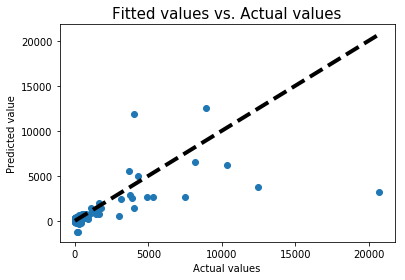


Mean squared error = 967957.290



In [80]:
#Problem 1.3
def plt_LR_0(feature_df):
    # TOP 3:'time','followers_total','max_followers'
    y = np.nan_to_num(feature_df['tweets_total'].values)
    feature_df.drop(columns =['tweets_total','retweets_total'],inplace = True)
    x = np.nan_to_num(feature_df.values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    MSE = mean_squared_error(target_data, predicted_data)

    fig, ax = plt.subplots()
    ax.scatter(target_data, predicted_data)
    ax.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()], 'k--', lw = 4)
    ax.set_xlabel('Actual values', fontsize = 10)
    ax.set_ylabel('Predicted value', fontsize = 10)
    plt.title('Fitted values vs. Actual values', fontsize = 15)
    plt.show()
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    
df = load_file(files[0])
feature_df = get_features(df)
plt_LR_0(feature_df)



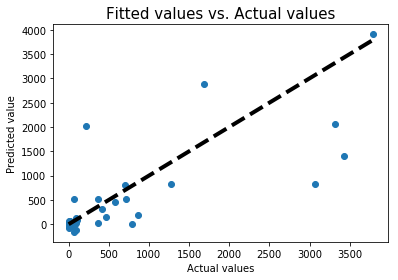


Mean squared error = 39072.112



In [89]:
def plt_LR_1(feature_df):
    # TOP 3:'retweets_total','followers_total','max_followers'
    y = np.nan_to_num(feature_df['tweets_total'].values)
    feature_df.drop(columns =['time','tweets_total'],inplace = True)
    x = np.nan_to_num(feature_df.values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    MSE = mean_squared_error(target_data, predicted_data)

    fig, ax = plt.subplots()
    ax.scatter(target_data, predicted_data)
    ax.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()], 'k--', lw = 4)
    ax.set_xlabel('Actual values', fontsize = 10)
    ax.set_ylabel('Predicted value', fontsize = 10)
    plt.title('Fitted values vs. Actual values', fontsize = 15)
    plt.show()
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    
df = load_file(files[1])
feature_df = get_features(df)
plt_LR_1(feature_df)

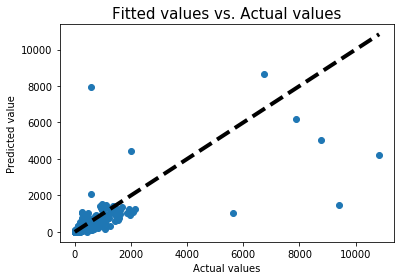


Mean squared error = 411319.289



In [90]:
def plt_LR_2(feature_df):
    # TOP 3:'tweets_total'','followers_total','max_followers'
    y = np.nan_to_num(feature_df['tweets_total'].values)
    feature_df.drop(columns =['time','retweets_total'],inplace = True)
    x = np.nan_to_num(feature_df.values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    MSE = mean_squared_error(target_data, predicted_data)



    fig, ax = plt.subplots()
    ax.scatter(target_data, predicted_data)
    ax.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()], 'k--', lw = 4)
    ax.set_xlabel('Actual values', fontsize = 10)
    ax.set_ylabel('Predicted value', fontsize = 10)
    plt.title('Fitted values vs. Actual values', fontsize = 15)
    plt.show()
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    
df = load_file(files[2])
feature_df = get_features(df)
plt_LR_1(feature_df)

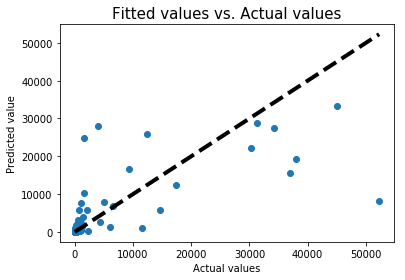


Mean squared error = 8238709.674



In [91]:
def plt_LR_3(feature_df):
    # TOP 3:'tweets_total'','followers_total','max_followers'
    y = np.nan_to_num(feature_df['tweets_total'].values)
    feature_df.drop(columns =['time','retweets_total'],inplace = True)
    x = np.nan_to_num(feature_df.values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    MSE = mean_squared_error(target_data, predicted_data)

    fig, ax = plt.subplots()
    ax.scatter(target_data, predicted_data)
    ax.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()], 'k--', lw = 4)
    ax.set_xlabel('Actual values', fontsize = 10)
    ax.set_ylabel('Predicted value', fontsize = 10)
    plt.title('Fitted values vs. Actual values', fontsize = 15)
    plt.show()
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    
df = load_file(files[3])
feature_df = get_features(df)
plt_LR_1(feature_df)

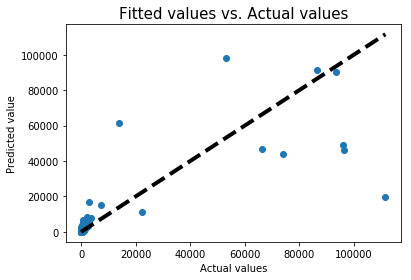


Mean squared error = 36835711.076



In [92]:
def plt_LR_4(feature_df):
    #Top 3 :'tweets_total','retweets_total','followers_total'
    y = np.nan_to_num(feature_df['tweets_total'].values)
    feature_df.drop(columns =['time','max_followers'],inplace = True)
    x = np.nan_to_num(feature_df.values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    MSE = mean_squared_error(target_data, predicted_data)



    fig, ax = plt.subplots()
    ax.scatter(target_data, predicted_data)
    ax.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()], 'k--', lw = 4)
    ax.set_xlabel('Actual values', fontsize = 10)
    ax.set_ylabel('Predicted value', fontsize = 10)
    plt.title('Fitted values vs. Actual values', fontsize = 15)
    plt.show()
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    
df = load_file(files[4])
feature_df = get_features(df)
plt_LR_1(feature_df)

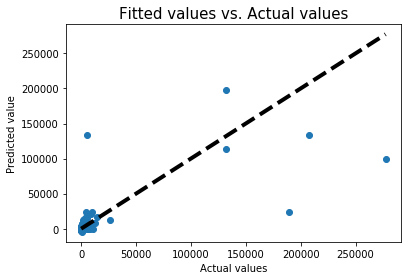


Mean squared error = 152133927.296



In [93]:
def plt_LR_5(feature_df):
    #Top 3 :'tweets_total','retweets_total','followers_total'
    y = np.nan_to_num(feature_df['tweets_total'].values)
    feature_df.drop(columns =['time','max_followers'],inplace = True)
    x = np.nan_to_num(feature_df.values)
    x_len = x.shape[0]
    train_data = x[0:x_len-1,:]
    y_len = len(y)
    target_data = y[1:y_len]
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(train_data, target_data)
    predicted_data = lin_reg_result.predict(train_data)
    MSE = mean_squared_error(target_data, predicted_data)

    fig, ax = plt.subplots()
    ax.scatter(target_data, predicted_data)
    ax.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()], 'k--', lw = 4)
    ax.set_xlabel('Actual values', fontsize = 10)
    ax.set_ylabel('Predicted value', fontsize = 10)
    plt.title('Fitted values vs. Actual values', fontsize = 15)
    plt.show()
    print("")
    print("Mean squared error = %.3f" % (MSE))
    print("")
    
df = load_file(files[5])
feature_df = get_features(df)
plt_LR_1(feature_df)